In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. 准备数据

In [2]:
# 生成训练数据，train_X是等差数列， train_Y是 y=2x 加上随机误差 
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X +np.random.randn(*train_X.shape) * 0.3

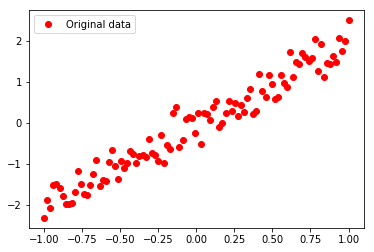

In [3]:
# 显示数据
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

# 2. 创建模型

In [4]:
# 占位符
X = tf.placeholder('float')
Y = tf.placeholder('float')
# 模型参数
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.zeros([1]), name = 'bias')
# 前向结构
z = tf.multiply(X, W) + b
# 随后调用tf-board，将预测值以直方图形式显示
tf.summary.histogram('z', z)

Instructions for updating:
Colocations handled automatically by placer.


<tf.Tensor 'z:0' shape=() dtype=string>

In [5]:
# 反向优化
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 随后调用tf-board，将损失值以标量形式显示
tf.summary.scalar('loss_function', cost)

Instructions for updating:
Use tf.cast instead.


<tf.Tensor 'loss_function:0' shape=() dtype=string>

# 3. 训练模型

In [6]:
# 初始化所有变量
init = tf.global_variables_initializer()

# 定义参数
training_epochs = 20
display_step = 2

# 利用Saver保存和重新加载模型
# max_to_keep = 1表示最多只保存一个检查点文件
saver = tf.train.Saver(max_to_keep = 1)
savedir = "log/"

In [7]:
plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

Epoch: 1 cost =  0.18581127 W =  [1.4944209] b =  [0.11415812]
Epoch: 3 cost =  0.085703544 W =  [1.8688354] b =  [0.00924318]
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Epoch: 5 cost =  0.07841535 W =  [1.9698652] b =  [-0.02887413]
Epoch: 7 cost =  0.07813194 W =  [1.996059] b =  [-0.03891489]
Epoch: 9 cost =  0.07816737 W =  [2.002833] b =  [-0.04151424]
Epoch: 11 cost =  0.07818382 W =  [2.0045848] b =  [-0.04218644]
Epoch: 13 cost =  0.07818856 W =  [2.005037] b =  [-0.04236008]
Epoch: 15 cost =  0.07818982 W =  [2.005155] b =  [-0.04240526]
Epoch: 17 cost =  0.07819015 W =  [2.0051854] b =  [-0.04241694]
Epoch: 19 cost =  0.07819024 W =  [2.0051932] b =  [-0.04241996]
Finished!
cost =  0.07819024 W =  [2.0051942] b =  [-0.04242036]


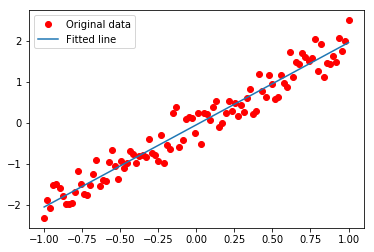

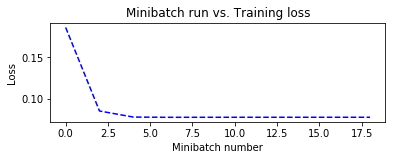

x=0.2，z= [0.3586185]


In [8]:
# 启动session
with tf.Session() as sess:
    sess.run(init)
    
    # 合并所有summary
    merged_summary_op = tf.summary.merge_all()
    # 创建summary_writer用于写文件
    summary_writer = tf.summary.FileWriter('log/mnist_with_summaries', sess.graph)
    
    # 存放批次值和损失值
    plotdata = {'batchsize':[], 'loss':[]}
    # 输入数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x, Y: y})
            #生成summary
            summary_str = sess.run(merged_summary_op,feed_dict={X: x, Y: y})
            #将summary 写入文件
            summary_writer.add_summary(summary_str, epoch)

            
            
        # 显示信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
            print("Epoch:", epoch + 1, "cost = ", loss, "W = ", sess.run(W), "b = ", sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
            # 保存模型
            saver.save(sess, savedir + "linearmodel.cpkt", global_step = epoch)
                
    print("Finished!")
    print("cost = ", sess.run(cost, feed_dict = {X: train_X, Y: train_Y}), 
          "W = ", sess.run(W), "b = ", sess.run(b))
    
    # 图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
    plt.show()

    # 测试
    print ("x=0.2，z=", sess.run(z, feed_dict={X: 0.2}))

# 4. 载入模型

In [11]:
# 查看保存的内容
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
print_tensors_in_checkpoint_file(savedir + "linearmodel.cpkt", None, True)

Unsuccessful TensorSliceReader constructor: Failed to find any matching files for log/linearmodel.cpkt


In [10]:
# 重新加载模型
load_epoch = 18
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    kpt = tf.train.latest_checkpoint(savedir)
    if kpt != None:
        saver.restore(sess2, kpt)
    # 测试
    print ("x=0.2，z=", sess2.run(z, feed_dict={X: 0.2}))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from log/linearmodel.cpkt-18
x=0.2，z= [0.35861868]
